In [1]:
!pip install download

In [2]:
from __future__ import absolute_import, division, print_function, unicode_literals

import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt
import os
from datetime import datetime

from download import download
import pandas as pd
import numpy as np

mpl.rcParams['figure.figsize'] = (8,6)
mpl.rcParams['axes.grid'] = False



In [3]:
path = download("https://archive.ics.uci.edu/ml/machine-learning-databases/00501/PRSA2017_Data_20130301-20170228.zip", "/tmp/aq", kind="zip")

Creating data folder...

file_sizes: 100%|██████████████████████████| 7.96M/7.96M [00:01<00:00, 5.33MB/s]
Extracting zip file...
Successfully downloaded / unzipped to /tmp/aq


In [4]:
!ls -alrt /tmp/aq/PRSA_Data_20130301-20170228

total 31780
drwxr-xr-x 3 root root    4096 Apr  8 13:54 ..
-rw-r--r-- 1 root root 2835916 Apr  8 13:54 PRSA_Data_Aotizhongxin_20130301-20170228.csv
-rw-r--r-- 1 root root 2722295 Apr  8 13:54 PRSA_Data_Changping_20130301-20170228.csv
-rw-r--r-- 1 root root 2675856 Apr  8 13:54 PRSA_Data_Dingling_20130301-20170228.csv
-rw-r--r-- 1 root root 2636684 Apr  8 13:54 PRSA_Data_Dongsi_20130301-20170228.csv
-rw-r--r-- 1 root root 2695860 Apr  8 13:54 PRSA_Data_Guanyuan_20130301-20170228.csv
-rw-r--r-- 1 root root 2654625 Apr  8 13:54 PRSA_Data_Gucheng_20130301-20170228.csv
-rw-r--r-- 1 root root 2641027 Apr  8 13:54 PRSA_Data_Huairou_20130301-20170228.csv
-rw-r--r-- 1 root root 2839705 Apr  8 13:54 PRSA_Data_Nongzhanguan_20130301-20170228.csv
-rw-r--r-- 1 root root 2620654 Apr  8 13:54 PRSA_Data_Shunyi_20130301-20170228.csv
-rw-r--r-- 1 root root 2655061 Apr  8 13:54 PRSA_Data_Tiantan_20130301-20170228.csv
-rw-r--r-- 1 root root 2659544 Apr  8 13:54 PRSA_Data_Wanliu_20130301-20170228.csv
drwxr-

In [5]:
df = pd.read_csv('/tmp/aq/PRSA_Data_20130301-20170228/PRSA_Data_Dingling_20130301-20170228.csv', encoding='ISO-8859-1')


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35064 entries, 0 to 35063
Data columns (total 18 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   No       35064 non-null  int64  
 1   year     35064 non-null  int64  
 2   month    35064 non-null  int64  
 3   day      35064 non-null  int64  
 4   hour     35064 non-null  int64  
 5   PM2.5    34285 non-null  float64
 6   PM10     34408 non-null  float64
 7   SO2      34334 non-null  float64
 8   NO2      33830 non-null  float64
 9   CO       33052 non-null  float64
 10  O3       33850 non-null  float64
 11  TEMP     35011 non-null  float64
 12  PRES     35014 non-null  float64
 13  DEWP     35011 non-null  float64
 14  RAIN     35013 non-null  float64
 15  wd       34924 non-null  object 
 16  WSPM     35021 non-null  float64
 17  station  35064 non-null  object 
dtypes: float64(11), int64(5), object(2)
memory usage: 4.8+ MB


In [7]:

def convert_to_date(x):
  return datetime.strptime(x, '%Y %m %d %H')

df = pd.read_csv('/tmp/aq/PRSA_Data_20130301-20170228/PRSA_Data_Dingling_20130301-20170228.csv', parse_dates = [['year', 'month', 'day', 'hour']], date_parser=convert_to_date, keep_date_col=True)

In [8]:
df.head()

year_month_day_hour  No  year month day  ...  DEWP  RAIN   wd  WSPM   station
0 2013-03-01 00:00:00   1  2013     3   1  ... -19.7   0.0    E   0.5  Dingling
1 2013-03-01 01:00:00   2  2013     3   1  ... -19.0   0.0  ENE   0.7  Dingling
2 2013-03-01 02:00:00   3  2013     3   1  ... -19.9   0.0  ENE   0.2  Dingling
3 2013-03-01 03:00:00   4  2013     3   1  ... -19.1   0.0  NNE   1.0  Dingling
4 2013-03-01 04:00:00   5  2013     3   1  ... -19.4   0.0    N   2.1  Dingling

[5 rows x 19 columns]

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35064 entries, 0 to 35063
Data columns (total 19 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   year_month_day_hour  35064 non-null  datetime64[ns]
 1   No                   35064 non-null  int64         
 2   year                 35064 non-null  object        
 3   month                35064 non-null  object        
 4   day                  35064 non-null  object        
 5   hour                 35064 non-null  object        
 6   PM2.5                34285 non-null  float64       
 7   PM10                 34408 non-null  float64       
 8   SO2                  34334 non-null  float64       
 9   NO2                  33830 non-null  float64       
 10  CO                   33052 non-null  float64       
 11  O3                   33850 non-null  float64       
 12  TEMP                 35011 non-null  float64       
 13  PRES                 35014 non-

In [10]:
df['month'] = pd.to_numeric(df['month'])

In [11]:
print('Rows ', df.shape[0])
print('Columns ', df.shape[1])
print('Features ', df.columns.tolist())
print('\nMissing values \n', df.isnull().any())
print('\nUnique Values \n', df.nunique())



Rows  35064
Columns  19
Features  ['year_month_day_hour', 'No', 'year', 'month', 'day', 'hour', 'PM2.5', 'PM10', 'SO2', 'NO2', 'CO', 'O3', 'TEMP', 'PRES', 'DEWP', 'RAIN', 'wd', 'WSPM', 'station']

Missing values 
 year_month_day_hour    False
No                     False
year                   False
month                  False
day                    False
hour                   False
PM2.5                   True
PM10                    True
SO2                     True
NO2                     True
CO                      True
O3                      True
TEMP                    True
PRES                    True
DEWP                    True
RAIN                    True
wd                      True
WSPM                    True
station                False
dtype: bool

Unique Values 
 year_month_day_hour    35064
No                     35064
year                       5
month                     12
day                       31
hour                      24
PM2.5                    486
PM1

In [12]:
# Run descriptive analysis to get the anomaly if any.

df_non_indexed = df.copy()
df = df.set_index('year_month_day_hour')
# Index is important for faster query execution

In [13]:
df.loc['2013-03-01': '2013-03-05']

No  year  month day hour  ...  DEWP  RAIN   wd  WSPM   station
year_month_day_hour                             ...                                 
2013-03-01 00:00:00    1  2013      3   1    0  ... -19.7   0.0    E   0.5  Dingling
2013-03-01 01:00:00    2  2013      3   1    1  ... -19.0   0.0  ENE   0.7  Dingling
2013-03-01 02:00:00    3  2013      3   1    2  ... -19.9   0.0  ENE   0.2  Dingling
2013-03-01 03:00:00    4  2013      3   1    3  ... -19.1   0.0  NNE   1.0  Dingling
2013-03-01 04:00:00    5  2013      3   1    4  ... -19.4   0.0    N   2.1  Dingling
...                  ...   ...    ...  ..  ...  ...   ...   ...  ...   ...       ...
2013-03-05 19:00:00  116  2013      3   5   19  ...  -7.6   0.0  NNE   0.2  Dingling
2013-03-05 20:00:00  117  2013      3   5   20  ...  -7.3   0.0  NNE   0.7  Dingling
2013-03-05 21:00:00  118  2013      3   5   21  ...  -7.3   0.0  NNE   0.2  Dingling
2013-03-05 22:00:00  119  2013      3   5   22  ...  -7.0   0.0    N   1.7  Dingling
2013-03-05 23:00:00  120  2013      3   5   23  ...  -6.9   0.0   NE   0.4  Dingling

[120 rows x 18 columns]

In [14]:
pm_data = df['PM2.5']
pm_data.head()

year_month_day_hour
2013-03-01 00:00:00    4.0
2013-03-01 01:00:00    7.0
2013-03-01 02:00:00    5.0
2013-03-01 03:00:00    6.0
2013-03-01 04:00:00    5.0
Name: PM2.5, dtype: float64

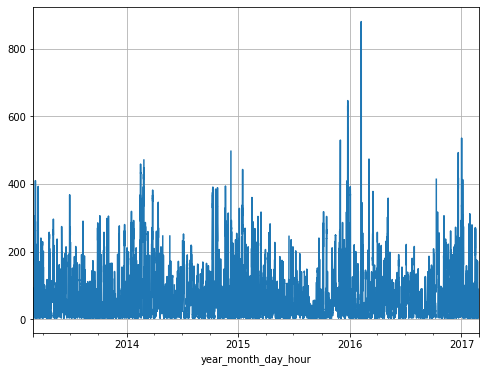

In [15]:
pm_data.plot(grid=True)

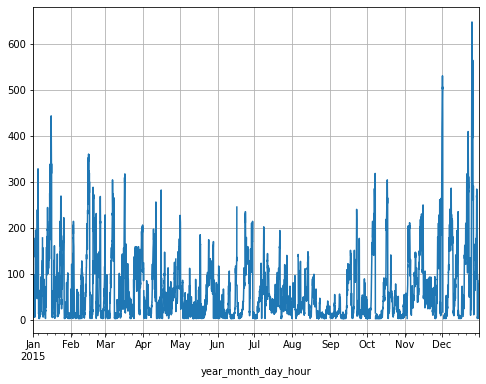

In [16]:
df_2015 = df.loc['2015']
pm_data_2015=df_2015['PM2.5']
pm_data_2015.plot(grid=True)

In [17]:
import plotly.express as px
fig = px.line(df_non_indexed, x='year_month_day_hour', y='PM2.5', title='PM2.5 with slider')

fig.update_xaxes(rangeslider_visible=True)
fig.show()

In [18]:
# Awesome thing
fig = px.line(df_non_indexed, x='year_month_day_hour', y='PM2.5', title='PM2.5 with slider')

fig.update_xaxes(rangeslider_visible=True, 
                 rangeselector=dict(
                     buttons=list([
                                  dict(count=1, label='1y', step='year', stepmode='backward'),
                                  dict(count=2, label='2y', step='year', stepmode='backward'),
                                  dict(count=3, label='3y', step='year', stepmode='backward'),
                                  dict(step='all')
                     ])
                     )
                 )
fig.show()

In [19]:
df_2014 = df['2014'].reset_index()
df_2015 = df['2015'].reset_index()
df_2014['month_day_hour'] = df_2014.apply(lambda x: str(x['month'])+'-'+x['day'], axis=1)
df_2015['month_day_hour'] = df_2015.apply(lambda x: str(x['month'])+'-'+x['day'], axis=1)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: UserWarning:

Legend does not support '2' instances.
A proxy artist may be used instead.
See: http://matplotlib.org/users/legend_guide.html#creating-artists-specifically-for-adding-to-the-legend-aka-proxy-artists

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: UserWarning:

Legend does not support '0' instances.
A proxy artist may be used instead.
See: http://matplotlib.org/users/legend_guide.html#creating-artists-specifically-for-adding-to-the-legend-aka-proxy-artists

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: UserWarning:

Legend does not support '1' instances.
A proxy artist may be used instead.
See: http://matplotlib.org/users/legend_guide.html#creating-artists-specifically-for-adding-to-the-legend-aka-proxy-artists

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: UserWarning:

Legend does not support '4' instances.
A proxy artist may be used instead.
See: http://m

Text(0.5, 1.0, 'Air Quality plot for the year 2014 and 2015')

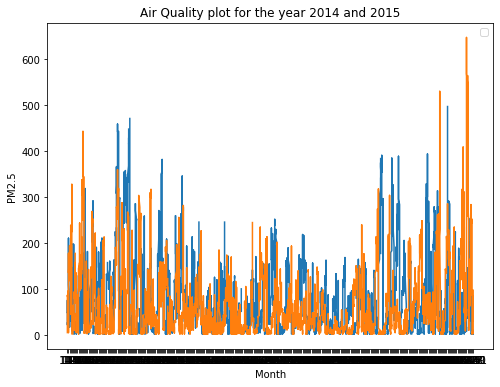

In [20]:
plt.plot(df_2014['month_day_hour'], df_2014['PM2.5'])
plt.plot(df_2015['month_day_hour'], df_2015['PM2.5'])
plt.legend('2014','2015')
plt.xlabel('Month')
plt.ylabel('PM2.5')
plt.title('Air Quality plot for the year 2014 and 2015')

In [21]:
df['2014':'2016'][['month', 'PM2.5']].groupby('month').describe()

PM2.5                                                       
        count       mean         std  min   25%   50%     75%    max
month                                                               
1      2173.0  70.285274   75.913587  3.0  12.0  38.0  113.00  443.0
2      1978.0  86.389282  105.603069  3.0  10.0  33.0  132.00  881.0
3      2212.0  80.193852   87.889440  3.0  13.0  47.0  123.25  474.0
4      2105.0  67.963325   56.430235  3.0  25.0  54.0   95.00  346.0
5      2188.0  47.994378   44.843130  3.0  16.0  35.0   67.00  358.0
6      2119.0  46.655403   43.877349  3.0  13.0  31.0   69.00  245.0
7      2205.0  61.671474   50.926149  3.0  21.0  48.0   91.00  252.0
8      2206.0  41.364869   37.279312  3.0  13.0  29.0   60.00  217.0
9      2074.0  45.356123   43.235331  3.0  11.0  27.0   78.00  240.0
10     2081.0  82.586257   92.234361  3.0  13.0  43.0  124.00  414.0
11     2141.0  77.500140   71.720648  3.0  20.0  56.0  112.00  394.0
12     2186.0  87.990851  104.677021  3.0  11.0  48.5  135.00  647.0

In [22]:
df['2014':'2016'][['month', 'PM2.5', 'TEMP']].groupby('month').agg({'PM2.5': ['max'], 'TEMP':['min', 'max']})

PM2.5  TEMP      
         max   min   max
month                   
1      443.0 -16.6  12.4
2      881.0 -10.9  14.0
3      474.0  -6.4  26.0
4      346.0   1.3  32.0
5      358.0   7.0  41.4
6      245.0  15.1  38.1
7      252.0  16.8  39.2
8      217.0  16.6  36.3
9      240.0   7.8  34.5
10     414.0  -1.4  28.1
11     394.0 -10.3  20.8
12     647.0  -9.7  11.6

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f596ed80a90>,
      dtype=object)

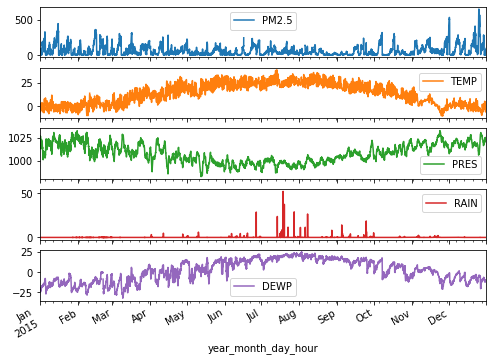

In [23]:
df_2015=df['2015']
pm_data_2015=df_2015[['PM2.5', 'TEMP', 'PRES', 'RAIN', 'DEWP']]
pm_data_2015.plot(subplots=True)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f596e979050>,
      dtype=object)

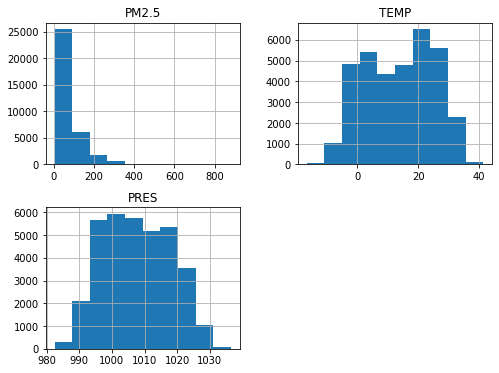

In [24]:
df[['PM2.5', 'TEMP', 'PRES']].hist()

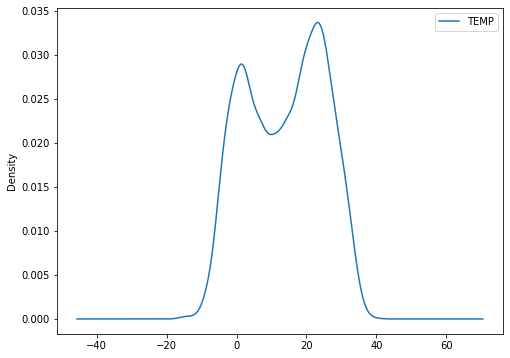

In [25]:
df[['TEMP']].plot(kind='density')

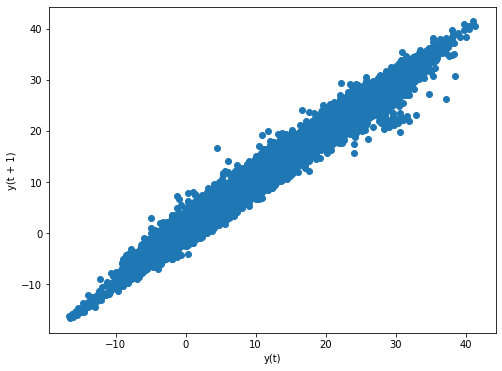

In [26]:
# Lag plot is scatter plot with lag, to check linearity between the time periods, outliers detection
pd.plotting.lag_plot(df['TEMP'], lag=1)

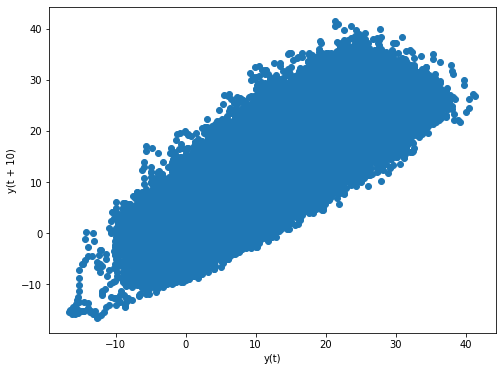

In [27]:
pd.plotting.lag_plot(df['TEMP'], lag=10)

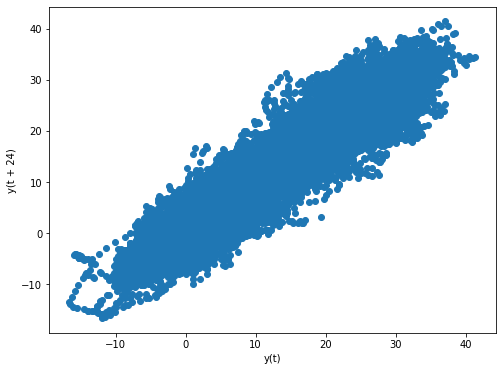

In [28]:
pd.plotting.lag_plot(df['TEMP'], lag=24)

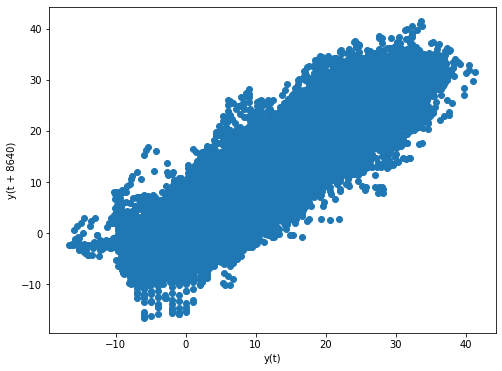

In [29]:
pd.plotting.lag_plot(df['TEMP'], lag=8640)

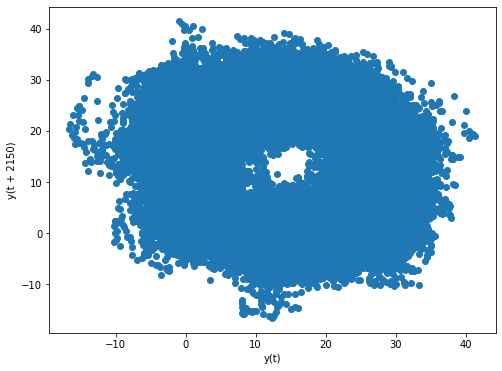

In [30]:
pd.plotting.lag_plot(df['TEMP'], lag=2150)

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f5963e60b90>,
      dtype=object)

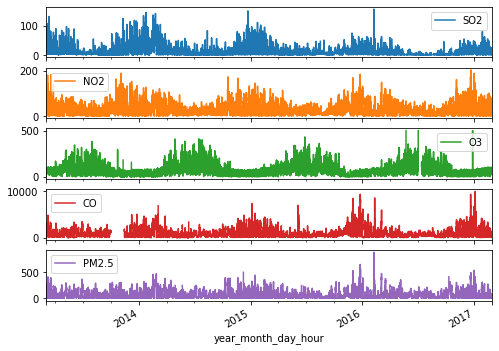

In [31]:
multi_data = df[['SO2', 'NO2', 'O3', 'CO', 'PM2.5']]
multi_data.plot(subplots=True)

Text(0.5, 0, 'year_month_day_hour')

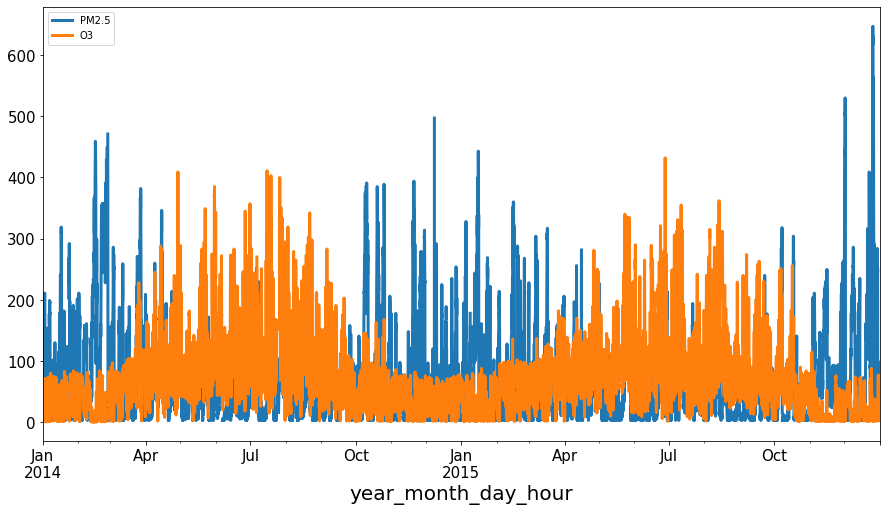

In [32]:
df['2014':'2015'][['PM2.5','O3']].plot(figsize=(15,8), linewidth=3, fontsize=15)
plt.xlabel('year_month_day_hour', fontsize=20)

#Mutually exclusive series

In [33]:
#Handle Null values
# Dropping is not an option as continuity is needed in TS

df.isnull().values.any()

True

In [34]:
df.isnull().any()

No         False
year       False
month      False
day        False
hour       False
PM2.5       True
PM10        True
SO2         True
NO2         True
CO          True
O3          True
TEMP        True
PRES        True
DEWP        True
RAIN        True
wd          True
WSPM        True
station    False
dtype: bool

In [35]:
df.isnull().sum()

No            0
year          0
month         0
day           0
hour          0
PM2.5       779
PM10        656
SO2         730
NO2        1234
CO         2012
O3         1214
TEMP         53
PRES         50
DEWP         53
RAIN         51
wd          140
WSPM         43
station       0
dtype: int64

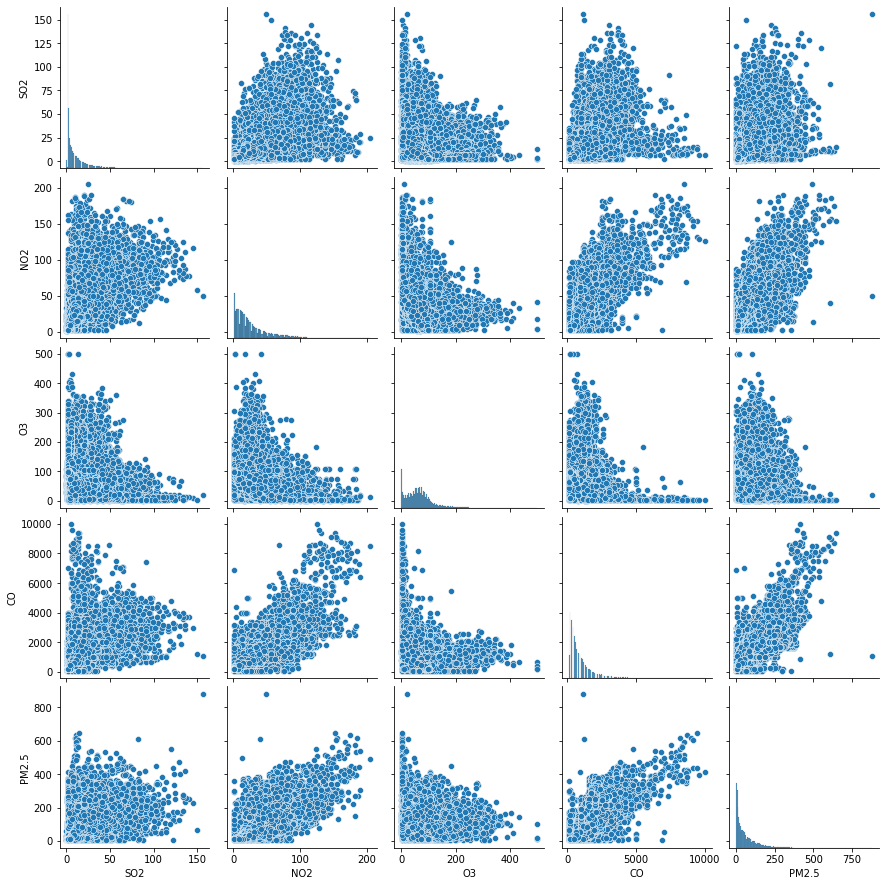

In [36]:
g = sns.pairplot(df[['SO2', 'NO2', 'O3', 'CO', 'PM2.5']])

In [37]:
df_corr = df[['SO2', 'NO2', 'O3', 'CO', 'PM2.5']].corr(method='pearson')
df_corr

SO2       NO2        O3        CO     PM2.5
SO2    1.000000  0.610433 -0.182096  0.529182  0.475117
NO2    0.610433  1.000000 -0.373625  0.798753  0.718170
O3    -0.182096 -0.373625  1.000000 -0.303275 -0.100542
CO     0.529182  0.798753 -0.303275  1.000000  0.802737
PM2.5  0.475117  0.718170 -0.100542  0.802737  1.000000

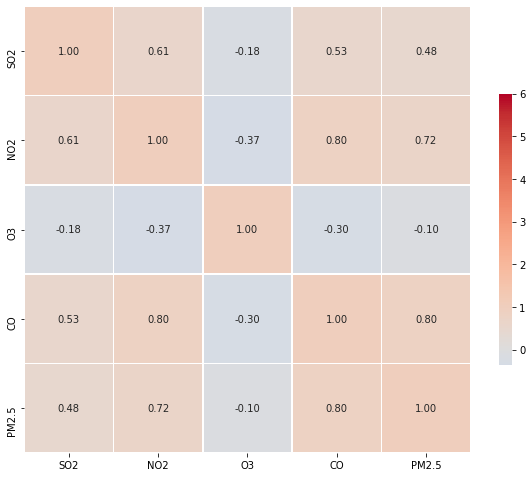

In [38]:
g=sns.heatmap(df_corr, vmax=6, center=0,
              square=True, linewidth=.5,cbar_kws={'shrink':.5}, annot=True, fmt='.2f', cmap='coolwarm')
g.figure.set_size_inches(10,10)
plt.show()

In [39]:
df.groupby('wd').agg(median=('PM2.5', 'median'), mean=('PM2.5', 'mean'), max=('PM2.5', 'max'), min=('PM2.5', 'min')).reset_index()

wd  median       mean    max  min
0     E    70.0  88.623363  434.0  3.0
1   ENE    56.5  77.685514  647.0  3.0
2   ESE    78.5  96.492276  632.0  3.0
3     N    29.0  57.546221  536.0  3.0
4    NE    32.0  57.390083  530.0  3.0
5   NNE    26.0  53.946239  881.0  3.0
6   NNW    33.0  62.790775  548.0  3.0
7    NW    21.0  52.769116  535.0  3.0
8     S    52.0  72.497281  511.0  3.0
9    SE    70.0  85.045709  617.0  3.0
10  SSE    61.0  79.925967  614.0  3.0
11  SSW    50.0  73.078253  493.0  3.0
12   SW    46.0  70.233140  459.0  3.0
13    W    22.0  49.488104  446.0  3.0
14  WNW    14.0  37.307447  515.0  3.0
15  WSW    39.0  66.725926  451.0  3.0

In [40]:
df_na=df.copy()
df_na = df_na.dropna()

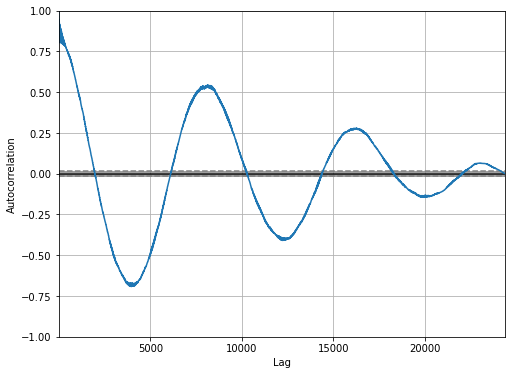

In [41]:
pd.plotting.autocorrelation_plot(df_na['2014':'2016']['TEMP'])

In [42]:
df_na['TEMP'].resample('1m').mean()

year_month_day_hour
2013-03-31     6.039970
2013-04-30    12.208494
2013-05-31    21.886386
2013-06-30    23.752827
2013-07-31    27.405079
2013-08-31    27.228465
2013-09-30    20.482500
2013-10-31          NaN
2013-11-30     5.434524
2013-12-31     0.896623
2014-01-31     0.023428
2014-02-28    -0.352762
2014-03-31    10.415449
2014-04-30    17.235362
2014-05-31    22.043236
2014-06-30    25.194985
2014-07-31    28.409502
2014-08-31    26.284552
2014-09-30    20.834161
2014-10-31    13.556000
2014-11-30     6.357762
2014-12-31    -0.745582
2015-01-31    -0.590377
2015-02-28     1.572512
2015-03-31     8.707613
2015-04-30    15.566570
2015-05-31    21.300275
2015-06-30    24.636691
2015-07-31    26.228630
2015-08-31    26.135854
2015-09-30    20.392206
2015-10-31    14.387465
2015-11-30     3.358686
2015-12-31    -0.053912
2016-01-31    -4.233428
2016-02-29     1.434441
2016-03-31     8.687006
2016-04-30    16.262014
2016-05-31    20.793142
2016-06-30    25.481977
2016-07-31    25.839

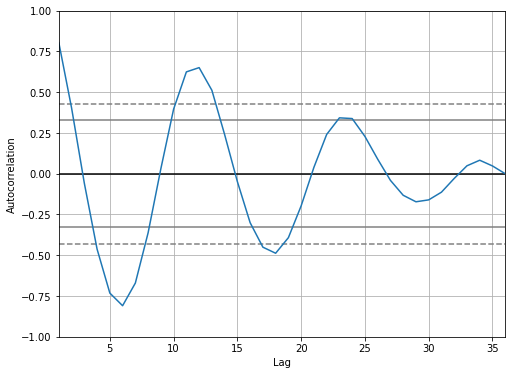

In [43]:
pd.plotting.autocorrelation_plot(df_na['2014':'2016']['TEMP'].resample('1m').mean())

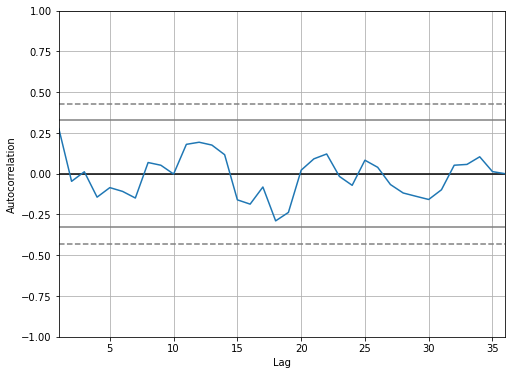

In [44]:
pd.plotting.autocorrelation_plot(df_na['2014':'2016']['PM2.5'].resample('1m').mean())

## Handling Missing Values

we need continuity as TS is order of events. We cannot impute the missing values with mean as we will loose seasonlity and trends.

In [45]:
df.isnull().any()

No         False
year       False
month      False
day        False
hour       False
PM2.5       True
PM10        True
SO2         True
NO2         True
CO          True
O3          True
TEMP        True
PRES        True
DEWP        True
RAIN        True
wd          True
WSPM        True
station    False
dtype: bool

In [47]:
# Awesome thing
df.query('TEMP != TEMP').count()

No         53
year       53
month      53
day        53
hour       53
PM2.5      53
PM10       53
SO2        53
NO2        53
CO         53
O3         53
TEMP        0
PRES        3
DEWP        0
RAIN        3
wd         10
WSPM       10
station    53
dtype: int64

In [48]:
df[df['PM2.5'].isnull()]

No  year  month day  ... RAIN   wd  WSPM   station
year_month_day_hour                          ...                          
2013-04-01 08:00:00    753  2013      4   1  ...  0.0   NW   7.2  Dingling
2013-04-01 09:00:00    754  2013      4   1  ...  0.0  NNW   4.5  Dingling
2013-04-01 10:00:00    755  2013      4   1  ...  0.0  NNW   4.5  Dingling
2013-04-01 11:00:00    756  2013      4   1  ...  0.0  NNE   4.0  Dingling
2013-04-01 12:00:00    757  2013      4   1  ...  0.0   NE   5.0  Dingling
...                    ...   ...    ...  ..  ...  ...  ...   ...       ...
2017-02-20 15:00:00  34864  2017      2  20  ...  0.0  WNW   3.1  Dingling
2017-02-20 16:00:00  34865  2017      2  20  ...  0.0  WNW   3.4  Dingling
2017-02-20 18:00:00  34867  2017      2  20  ...  0.0   NE   1.1  Dingling
2017-02-21 11:00:00  34884  2017      2  21  ...  0.0  ESE   1.9  Dingling
2017-02-21 13:00:00  34886  2017      2  21  ...  0.0   SW   1.7  Dingling

[779 rows x 18 columns]

In [50]:
# Awesome thing
fig = px.line(df_non_indexed, x='year_month_day_hour', y='PM2.5', title='PM2.5 with slider')

fig.update_xaxes(rangeslider_visible=True, 
                 rangeselector=dict(
                     buttons=list([
                                  dict(count=1, label='1y', step='year', stepmode='backward'),
                                  dict(count=2, label='2y', step='year', stepmode='backward'),
                                  dict(count=3, label='3y', step='year', stepmode='backward'),
                                  dict(step='all')
                     ])
                     )
                 )
fig.show()

In [51]:
fig = px.line(df_non_indexed, x='year_month_day_hour', y='TEMP', title='PM2.5 with slider')

fig.update_xaxes(rangeslider_visible=True, 
                 rangeselector=dict(
                     buttons=list([
                                  dict(count=1, label='1y', step='year', stepmode='backward'),
                                  dict(count=2, label='2y', step='year', stepmode='backward'),
                                  dict(count=3, label='3y', step='year', stepmode='backward'),
                                  dict(step='all')
                     ])
                     )
                 )
fig.show()

In [53]:
aq_df = df_non_indexed.copy()

aq_df = aq_df.set_index('year_month_day_hour')

In [55]:
aq_df_na = aq_df.copy()
aq_df_na = aq_df_na.dropna()

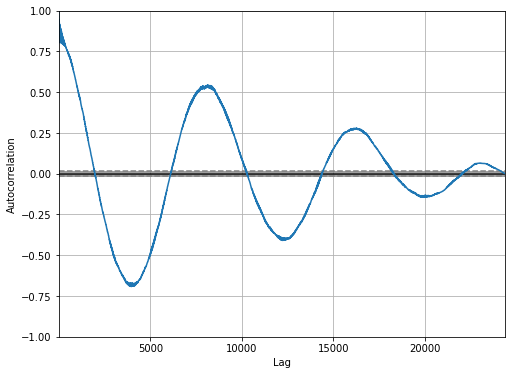

In [56]:
pd.plotting.autocorrelation_plot(aq_df_na['2014':'2016']['TEMP'])

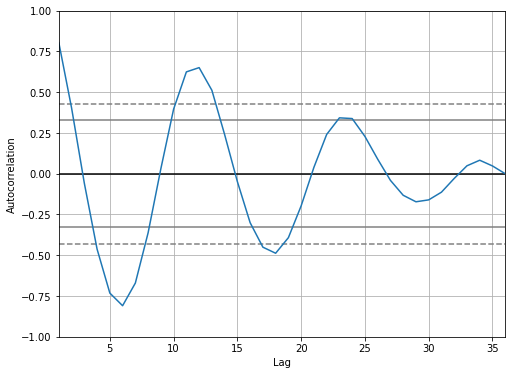

In [57]:
pd.plotting.autocorrelation_plot(aq_df_na['2014':'2016']['TEMP'].resample('1m').mean())

In [59]:
#Sample
aq_df_imp = aq_df['2015-02-21 10': '2015-02-21 20']

In [60]:
#Forward fill, previous value and filled
aq_df_imp['TEMP_FFILL']=aq_df_imp['TEMP'].fillna(method='ffill')

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [61]:
aq_df_imp.head()

No  year  month day  ...   wd  WSPM   station  TEMP_FFILL
year_month_day_hour                          ...                                 
2015-02-21 10:00:00  17339  2015      2  21  ...   SW   1.1  Dingling         1.0
2015-02-21 11:00:00  17340  2015      2  21  ...  SSW   1.2  Dingling         1.0
2015-02-21 12:00:00  17341  2015      2  21  ...  NaN   NaN  Dingling         1.0
2015-02-21 13:00:00  17342  2015      2  21  ...   SW   1.6  Dingling         2.0
2015-02-21 14:00:00  17343  2015      2  21  ...  NaN   NaN  Dingling         2.0

[5 rows x 19 columns]

In [62]:
aq_df_imp['TEMP'].rolling(window=2, min_periods=1).mean()

year_month_day_hour
2015-02-21 10:00:00    1.0
2015-02-21 11:00:00    1.0
2015-02-21 12:00:00    1.0
2015-02-21 13:00:00    2.0
2015-02-21 14:00:00    2.0
2015-02-21 15:00:00    4.0
2015-02-21 16:00:00    4.0
2015-02-21 17:00:00    3.5
2015-02-21 18:00:00    2.5
2015-02-21 19:00:00    1.5
2015-02-21 20:00:00    1.0
Name: TEMP, dtype: float64

In [63]:
aq_df_imp['TEMP_ROLLING'] = aq_df_imp['TEMP'].rolling(window=2, min_periods=1).mean()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [64]:
aq_df_imp[['TEMP', 'TEMP_FFILL', 'TEMP_ROLLING']]

TEMP  TEMP_FFILL  TEMP_ROLLING
year_month_day_hour                                
2015-02-21 10:00:00   1.0         1.0           1.0
2015-02-21 11:00:00   1.0         1.0           1.0
2015-02-21 12:00:00   NaN         1.0           1.0
2015-02-21 13:00:00   2.0         2.0           2.0
2015-02-21 14:00:00   NaN         2.0           2.0
2015-02-21 15:00:00   4.0         4.0           4.0
2015-02-21 16:00:00   4.0         4.0           4.0
2015-02-21 17:00:00   3.0         3.0           3.5
2015-02-21 18:00:00   2.0         2.0           2.5
2015-02-21 19:00:00   1.0         1.0           1.5
2015-02-21 20:00:00   NaN         1.0           1.0

In [66]:
aq_df.loc[aq_df_imp.index + pd.offsets.DateOffset(years=-1)]['TEMP']

year_month_day_hour
2014-02-21 10:00:00    1.4
2014-02-21 11:00:00    2.4
2014-02-21 12:00:00    3.0
2014-02-21 13:00:00    3.8
2014-02-21 14:00:00    3.5
2014-02-21 15:00:00    3.6
2014-02-21 16:00:00    3.3
2014-02-21 17:00:00    2.8
2014-02-21 18:00:00    1.3
2014-02-21 19:00:00    0.7
2014-02-21 20:00:00    1.2
Name: TEMP, dtype: float64

In [72]:
aq_df_imp=aq_df_imp.reset_index()

In [77]:
aq_df.head()

No  year  month day hour  ...  DEWP  RAIN   wd  WSPM   station
year_month_day_hour                            ...                                 
2013-03-01 00:00:00   1  2013      3   1    0  ... -19.7   0.0    E   0.5  Dingling
2013-03-01 01:00:00   2  2013      3   1    1  ... -19.0   0.0  ENE   0.7  Dingling
2013-03-01 02:00:00   3  2013      3   1    2  ... -19.9   0.0  ENE   0.2  Dingling
2013-03-01 03:00:00   4  2013      3   1    3  ... -19.1   0.0  NNE   1.0  Dingling
2013-03-01 04:00:00   5  2013      3   1    4  ... -19.4   0.0    N   2.1  Dingling

[5 rows x 18 columns]

In [78]:
aq_df_imp['TEMP_PREVV'] = aq_df_imp.apply(lambda x: aq_df.loc[x['year_month_day_hour'] - pd.offsets.DateOffset(years=-1)]['TEMP'] if pd.isna(x['TEMP']) else x['TEMP'], axis=1)

In [79]:
aq_df_imp.head()

level_0  index year_month_day_hour  ...  TEMP_FFILL TEMP_ROLLING  TEMP_PREVV
0        0      0 2015-02-21 10:00:00  ...         1.0          1.0         1.0
1        1      1 2015-02-21 11:00:00  ...         1.0          1.0         1.0
2        2      2 2015-02-21 12:00:00  ...         1.0          1.0         1.9
3        3      3 2015-02-21 13:00:00  ...         2.0          2.0         2.0
4        4      4 2015-02-21 14:00:00  ...         2.0          2.0         4.9

[5 rows x 24 columns]